In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fig_w, fig_h = (8, 6)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [44]:
# Transfer function 
def act_fun(x, g):
    return (np.tanh(g*x)) #+1)/2

def BNN(N_1 = 10, N_2= 100, T= 1000, dt = 0.025, g = 0.01, fluc = False, sigma = 0):

    μ_1 = 1.5 # feedforward input to pop1
    μ_2 = 0.0 # feedforward input to pop2


    #Using mean= 0 and var = 1/N_2
    #Where J = 1

    # Assuming conenction form pop1 to pop2 ,and non otherwise
    J_21 = np.random.normal(0, sigma, (N1,N2))
    J_22 = np.random.normal(0, 1/N2, (N2,N2))
    
#     # Making Jij symmetric with 0 diagonals
#     J_22 = (J_2 + J_2.T)/2 
    
    for i in range(N2):
        J_22[i,i] = 0
    
    
    tau_2 = 1 # time const. of input integration for all units pop2
    tau_1 = 1 # time const. of input inpop2

    t = np.arange(0, T, dt)
    Nsteps = len(t)
    
    # Initilzation 
    r_2 = np.zeros((N_2, Nsteps+1))
    r_1 = np.zeros((N_1, Nsteps+1))
    h_2 = np.random.rand(N_2)
    h_1 = np.random.rand(N_1)
    
    for k in range(Nsteps):
        for i in range(N_2):
            data_2 =  np.matmul(J_22[:,i],r_2[:,k])  
            if (fluc):
                data_2 += np.matmul(J_21[:,i],r_1[:,k]) 
            
            data_sum_2 = np.sum(data_2)                                                  
            h_2[i] += dt/tau_2 *(data_sum_2)
            r_2[i,k+1] = act_fun(h_2[i] + μ_2, g)

        # rates of firing for pop1 does not update hence
        for i in range(N_1):
            r_1[i,k+1] = act_fun(μ_1, g)
            
    return r_1, r_2, t

In [45]:
g_st = [0.1, 0.9, 1, 1.1, 2]
N1 = 10
N2 = 1000
dt = 0.025
T = 500
t = np.arange(0, T, dt)

rates = []

for g_val in g_st:
    print("Working on g =", g_val)
    r_1, r_2, _ = BNN(N_1 = N1, N_2= N2, T= T, dt = dt, g = g_val, fluc = False)
    rates.append(r_2)

Working on g = 0.1
Working on g = 0.9
Working on g = 1
Working on g = 1.1
Working on g = 2


In [86]:
# np.savetxt("rate_un1_g0_uns.txt", rates[0])
# np.savetxt("rate_un1_g1_uns.txt", rates[1])
# np.savetxt("rate_un1_g2_uns.txt", rates[2])
# np.savetxt("rate_un1_g3_uns.txt", rates[3])
# np.savetxt("rate_un1_g4_uns.txt", rates[4])

ValueError: x and y must have same first dimension, but have shapes (40000,) and (20000,)

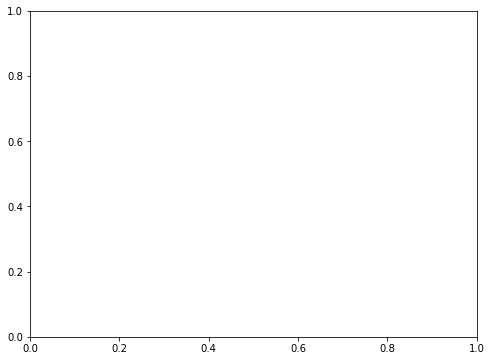

In [55]:
for i in range(len(g_st)):
    plt.plot(t, rates[i][14,1:], label = "Gain paramter = %.1f" % (g_st[i]*1))
plt.xlabel("Time (t)", fontsize=16)
plt.ylabel("Rate of Firing", fontsize=16)
plt.legend()
plt.xlim(0, 500)
#plt.savefig("Rat_evo_un1_14_uns.pdf")

In [80]:
# Average firing rate 
avg_rate = []

for i in range(len(g_st)):
    a_rate = np.sum(rates[i], axis= 0)
    #print(a_rate.shape)
    avg_rate.append(a_rate)

# Come back to this and run for std of rates
std_rate = []

for i in range(len(g_st)):
    s_rate = np.std(rates[i], axis= 0)
    #print(a_rate.shape)
    std_rate.append(s_rate)

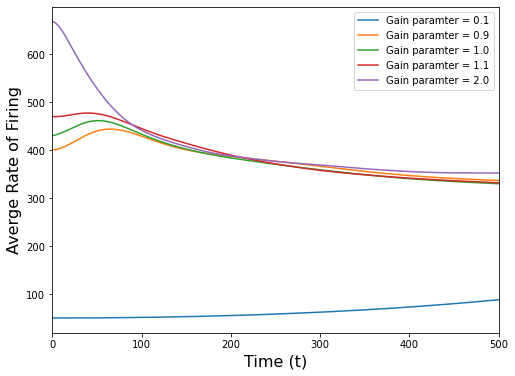

In [83]:
for i in range(len(g_st)):
    plt.plot(t, avg_rate[i][1:], label = "Gain paramter = %.1f" % (g_st[i]*1))
plt.xlabel("Time (t)", fontsize=16)
plt.ylabel("Averge Rate of Firing", fontsize=16)
plt.legend()
plt.xlim(0, 500)
#plt.savefig("Avg_Rate_evol_un1_uns.pdf")

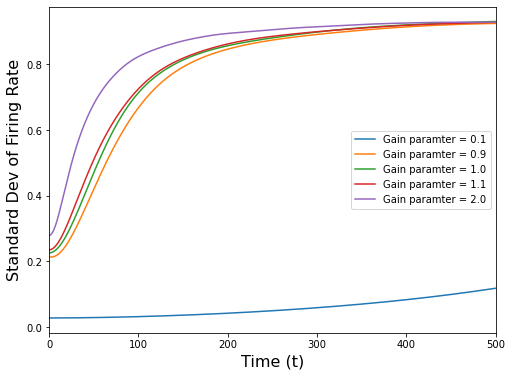

In [82]:
for i in range(len(g_st)):
    plt.plot(t, std_rate[i][1:], label = "Gain paramter = %.1f" % (g_st[i]*1))
plt.xlabel("Time (t)", fontsize=16)
plt.ylabel("Standard Dev of Firing Rate", fontsize=16)
plt.legend()
plt.xlim(0, 500)
#plt.savefig("Std_Rate_evol_un1_uns.pdf")

Adding fluctuations

In [31]:
g_sp = [0.5, 1, 1.5]
sigma = [ 0.1, 0.5, 1, 1.5]

In [32]:
def RNN_fluc(N_1 = 10, N_2= 100, T= 1000, dt = 0.025, g = 0.01, fluc = False, sigma = []):

    μ_1 = 1.5 # feedforward input to pop1
    μ_2 = 0.0 # feedforward input to pop2

    
    # Assuming conenction form pop1 to pop2 ,and non otherwise
    J_21 = np.random.normal(0, 1, (N1,N2))
    J_22 = np.random.normal(0, 1/N2, (N2,N2))
    
#     # Making Jij symmetric 
#     J_22 = (J_2 + J_2.T)/2 
    
    #Making diagnoals 0
    for i in range(N2):
        J_22[i,i] = 0
    
    
    tau_2 = 1 # time const. of input integration for all units pop2
    tau_1 = 1 # time const. of input inpop2


    t = np.arange(0, T, dt)
    Nsteps = len(t)
    
    rates = []
    
    for sig in sigma:
        print("Working on sig = ", sig)
    
        J_21 = J_21*sig
        
        # Initilzation 
        r_2 = np.zeros((N_2, Nsteps+1))
        r_1 = np.zeros((N_1, Nsteps+1))
        h_2 = np.random.rand(N_2)
        h_1 = np.random.rand(N_1)

        for k in range(Nsteps):
            for i in range(N_2):

                data_2 =  np.matmul(J_22[:,i],r_2[:,k])  + np.matmul(J_21[:,i],r_1[:,k]) 
                data_sum_2 = np.sum(data_2)                                                  
                h_2[i] += dt/tau_2 *(data_sum_2)
                r_2[i,k+1] = act_fun(h_2[i] + μ_2, g)

            # rates of firing for pop1 only depends on μ_1 or sig
            for i in range(N_1):
                r_1[i,k+1] = act_fun(sig, g)
                
        rates.append(r_2)
            
    return rates

In [46]:
N1 = 10
N2 = 100
dt = 0.025
T = 1000
t = np.arange(0, T, dt)

fluc_rates = []

for g_val in g_sp:
    print("Working on g =", g_val)
    frates = RNN_fluc(N_1 = N1, N_2= N2, T= T, dt = dt, g = g_val, sigma = sigma)
    fluc_rates.append(frates)

Working on g = 0.5
Working on sig =  0.1
Working on sig =  0.5
Working on sig =  1
Working on sig =  1.5
Working on g = 1
Working on sig =  0.1
Working on sig =  0.5
Working on sig =  1
Working on sig =  1.5
Working on g = 1.5
Working on sig =  0.1
Working on sig =  0.5
Working on sig =  1
Working on sig =  1.5


(0.0, 100.0)

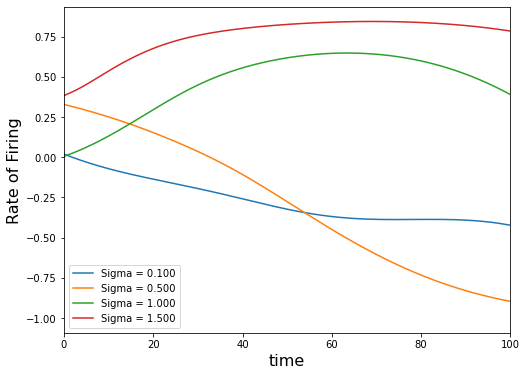

In [47]:
data = fluc_rates[0]

for i in range(len(sigma)):
    plt.plot(t, data[i][14,1:], label = "Sigma = %.3f" % (sigma[i]*1))
plt.xlabel("time", fontsize=16)
plt.ylabel("Rate of Firing", fontsize=16)
plt.legend()
plt.xlim(0, 100)
#plt.savefig("Rat_evo_14_uns.pdf")

In [50]:
# Average firing rate 
avg_rate = []

for i in range(len(fluc_rates)):
    for j in range(len(sigma)):
        a_rate = np.sum(fluc_rates[i][j], axis= 0)
        avg_rate.append(a_rate)
    


In [51]:
print(fluc_rates[0][0].shape)
print(avg_rate[0].shape)

(100, 40001)
(40001,)


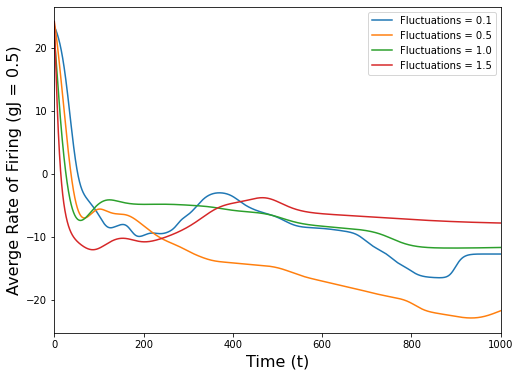

In [52]:
data = avg_rate[0:len(sigma)]
for i in range(len(sigma)):
    plt.plot(t, data[i][1:], label = "Fluctuations = %.1f" % (sigma[i]))
plt.xlabel("Time (t)", fontsize=16)
plt.ylabel("Averge Rate of Firing (gJ = 0.5)", fontsize=16)
plt.legend()
plt.xlim(0, 1000)
plt.savefig("Avg_Rate_evol_gj0_uns.pdf")

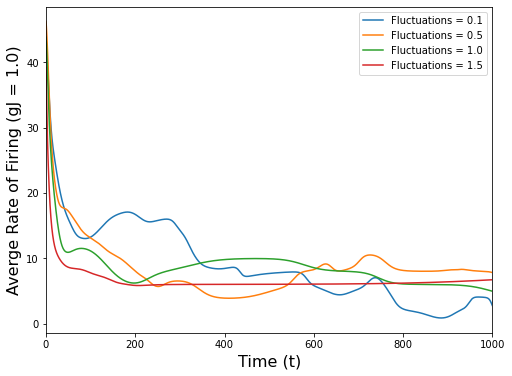

In [53]:
data = avg_rate[len(sigma):2*len(sigma)]
for i in range(len(sigma)):
    plt.plot(t, data[i][1:], label = "Fluctuations = %.1f" % (sigma[i]))
plt.xlabel("Time (t)", fontsize=16)
plt.ylabel("Averge Rate of Firing (gJ = 1.0)", fontsize=16)
plt.legend()
plt.xlim(0, 1000)
plt.savefig("Avg_Rate_evol_gj1_uns.pdf")

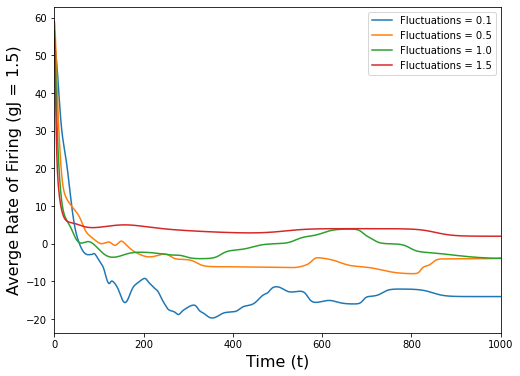

In [56]:
data = avg_rate[2*len(sigma):3*len(sigma)]
for i in range(len(sigma)):
    plt.plot(t, data[i][1:], label = "Fluctuations = %.1f" % (sigma[i]))
plt.xlabel("Time (t)", fontsize=16)
plt.ylabel("Averge Rate of Firing (gJ = 1.5)", fontsize=16)
plt.legend()
plt.xlim(0, 1000)
plt.savefig("Avg_Rate_evol_gj2_uns.pdf")